In [2]:
pip install "dask[complete]"


Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install nltk
import nltk as nltk


In [8]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stag_compta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
import pandas as pd
import numpy as np
import sys
import json
import glob
import os
import math
import dask.dataframe as dd
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords








In [10]:
df = dd.demo.make_timeseries('2000', '2001', freq='1s', dtypes={'value': float})
print(df.head())

                        value
timestamp                    
2000-01-31 00:00:00  0.001737
2000-01-31 00:00:01  0.052034
2000-01-31 00:00:02  0.619560
2000-01-31 00:00:03  0.049624
2000-01-31 00:00:04 -0.066948


In [11]:
json_folder = r"C:\Users\stag_compta\Documents\datasets\1\data"
parquet_folder = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet"

os.makedirs(parquet_folder, exist_ok=True)

json_files = glob.glob(os.path.join(json_folder, "*.json"))
print(f"Nombre de fichiers trouvés : {len(json_files)}")

for file in json_files:
    print(f"Conversion de {file}...")
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)              # charge le gros dictionnaire
        playlists = data["playlists"]    # extrait la liste des playlists

    # Normaliser en DataFrame
    df = pd.json_normalize(playlists)

    # Sauvegarder en Parquet
    base_name = os.path.basename(file).replace(".json", ".parquet")
    parquet_path = os.path.join(parquet_folder, base_name)
    df.to_parquet(parquet_path, engine="pyarrow", index=False)

print("✅ Conversion terminée, fichiers disponibles en Parquet")

Nombre de fichiers trouvés : 1000
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.0-999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.1000-1999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.10000-10999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.100000-100999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.101000-101999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.102000-102999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.103000-103999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.104000-104999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.105000-105999.json...
Conversion de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.106000-106999.json...
Conversion de C:\Users\stag_compta\Documents\datas

In [ ]:


json_folder = r"C:\Users\stag_compta\Documents\datasets\1\data"
parquet_folder_tracks = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks"

os.makedirs(parquet_folder_tracks, exist_ok=True)

json_files = glob.glob(os.path.join(json_folder, "*.json"))
print(f"Nombre de fichiers trouvés : {len(json_files)}")

for file in json_files:
    print(f"Conversion des tracks de {file}...")
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        playlists = data["playlists"]

    # Extract tracts from playlists
    rows = []
    for pl in playlists:
        pid = pl["pid"]
        for track in pl["tracks"]:
            track["pid"] = pid   # garder l’ID de la playlist
            rows.append(track)

    df_tracks = pd.DataFrame(rows)

    # Save in parquet
    base_name = os.path.basename(file).replace(".json", ".parquet")
    parquet_path = os.path.join(parquet_folder_tracks, base_name)
    df_tracks.to_parquet(parquet_path, engine="pyarrow", index=False)

print("saved")

Nombre de fichiers trouvés : 1000
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.0-999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.1000-1999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.10000-10999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.100000-100999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.101000-101999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.102000-102999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.103000-103999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.104000-104999.json...
Conversion des tracks de C:\Users\stag_compta\Documents\datasets\1\data\mpd.slice.105000-105999.json...
Conversion des tracks de C:\Users\stag_compt

In [ ]:
df_tracks = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks")

print(df_tracks.head())
print(df_tracks.columns)

   pos        artist_name                             track_uri  \
0    0      Missy Elliott  spotify:track:0UaMYEvWZi0ZqiDOoHU3YI   
1    1     Britney Spears  spotify:track:6I9VzXrHxO9rA9A5euc8Ak   
2    2            Beyoncé  spotify:track:0WqIKmW4BTrj3eJFmnCKMv   
3    3  Justin Timberlake  spotify:track:1AWQoqb9bSvzTjaLralEkT   
4    4             Shaggy  spotify:track:1lzr43nnXAijIGYnCT8M8H   

                              artist_uri  \
0  spotify:artist:2wIVse2owClT7go1WT98tk   
1  spotify:artist:26dSoYclwsYLMAKD3tpOr4   
2  spotify:artist:6vWDO969PvNqNYHIOW5v0m   
3  spotify:artist:31TPClRtHm23RisEBtV3X7   
4  spotify:artist:5EvFsr3kj42KNv97ZEnqij   

                                   track_name  \
0  Lose Control (feat. Ciara & Fat Man Scoop)   
1                                       Toxic   
2                               Crazy In Love   
3                              Rock Your Body   
4                                It Wasn't Me   

                              album_u

QUESTION 2

Dataset Overview

In [ ]:

df_playlists = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet")
df_tracks = dd.read_parquet(r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks")

In [ ]:
nb_playlists = df_playlists["pid"].nunique().compute()
nb_tracks_total = len(df_tracks)  
nb_tracks_uniques = df_tracks["track_uri"].nunique().compute()
nb_artists_uniques = df_tracks["artist_name"].nunique().compute()

print("General overview:")
print("Total number of playlists:", nb_playlists)
print("Total number of tracks:", nb_tracks_total)
print("Number of unique tracks:", nb_tracks_uniques)
print("Number of unique artists:", nb_artists_uniques)

General overview:
Total number of playlists: 1000000
Total number of tracks: 66346428
Number of unique tracks: 2262292
Number of unique artists: 287742


Playlist Structure

In [ ]:
import dask.dataframe as dd
import os

parquet_folder = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet"
track_files = [os.path.join(parquet_folder, f) for f in os.listdir(parquet_folder) if f.endswith("_tracks.parquet")]
df_tracks = dd.read_parquet(track_files, engine="pyarrow")

# --- Number of tracks per playlist ---
tracks_per_playlist = df_tracks.groupby("pid")["track_uri"].count().compute()

# --- Total duration per playlist (convert ms → minutes) ---
duration_per_playlist = (df_tracks.groupby("pid")["duration_ms"].sum().compute() / 60000)

# --- Descriptive statistics ---
print("\nPlaylist Structure:")
print("Tracks per playlist:")
print("Mean:", round(tracks_per_playlist.mean(), 1))
print("Median:", round(tracks_per_playlist.median(), 1))
print("Min:", int(tracks_per_playlist.min()))
print("Max:", int(tracks_per_playlist.max()))

print("\nDuration per playlist (minutes):")
print("Mean:", round(duration_per_playlist.mean(), 1))
print("Median:", round(duration_per_playlist.median(), 1))
print("Min:", round(duration_per_playlist.min(), 1))
print("Max:", round(duration_per_playlist.max(), 1))



Playlist Structure:
Tracks per playlist:
Mean: 66.3
Median: 49.0
Min: 5
Max: 376

Duration per playlist (minutes):
Mean: 259.7
Median: 190.4
Min: 1.6
Max: 10584.6


In [1]:
#histogram
plt.figure(figsize=(10,6))
sns.histplot(tracks_per_playlist, bins=50, color="green", edgecolor="black")
plt.title("Distribution of Number of Tracks per Playlist", fontsize=14)
plt.xlabel("Number of Tracks")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

Playlist diversity

In [ ]:
stats_tracks = df_playlists["num_tracks"].describe().compute()
stats_duration = df_playlists["duration_ms"].describe().compute()

print("\nPlaylists:")
print("Distribution of the number of tracks per playlist:")
print(stats_tracks)
print("Distribution of the total duration of playlists (ms):")
print(stats_duration)


In [ ]:
# Diversity
stats_artists = df_playlists["num_artists"].describe().compute()
stats_albums = df_playlists["num_albums"].describe().compute()

print("Diversity:")
print("Number of artists per playlist:")
print(stats_artists)
print("Number of albums per playlist:")
print(stats_albums)

Popularity bias and most frequent tracks analysis  

In [ ]:
# Number of unique tracks
nb_tracks = df_tracks["track_uri"].nunique().compute()

# Top 10 most frequent tracks
top_tracks = df_tracks["track_uri"].value_counts().nlargest(10).compute()

# Top 10 most frequent artists
top_artists = df_tracks["artist_name"].value_counts().nlargest(10).compute()

print("Number of unique tracks:", nb_tracks)
print("Top 10 most frequent tracks:")
print(top_tracks)

print("Top 10 most frequent artists:")
print(top_artists)

Number of unique tracks: 2262292
Top 10 most frequent tracks:
track_uri
spotify:track:7KXjTSCq5nL1LoYtL7XAwS    46574
spotify:track:1xznGGDReH1oQq0xzbwXa3    43447
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol    41309
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw    41079
spotify:track:3a1lNhkSLSkpJE4MSHpDu9    39987
spotify:track:5hTpBe8h35rJ67eAWHQsJx    35202
spotify:track:2EEeOnHehOozLq4aS0n6SL    35138
spotify:track:4Km5HrUvYTaSUfiSGPJeQR    34999
spotify:track:7GX5flRQZVHRAGd6B4TmDO    34922
spotify:track:152lZdxL1OR0ZMW6KquMif    34657
Name: count, dtype: int64[pyarrow]
Top 10 most frequent artists:
artist_name
Drake             847160
Kanye West        413297
Kendrick Lamar    353624
Rihanna           339570
The Weeknd        316603
Eminem            294667
Ed Sheeran        272116
Future            250734
Justin Bieber     243119
J. Cole           241560
Name: count, dtype: int64[pyarrow]


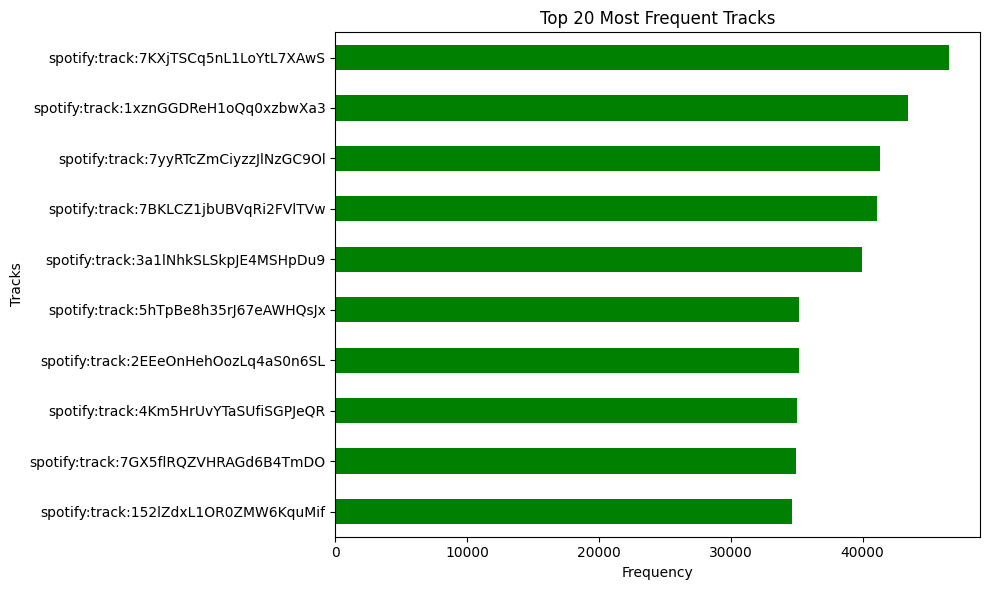

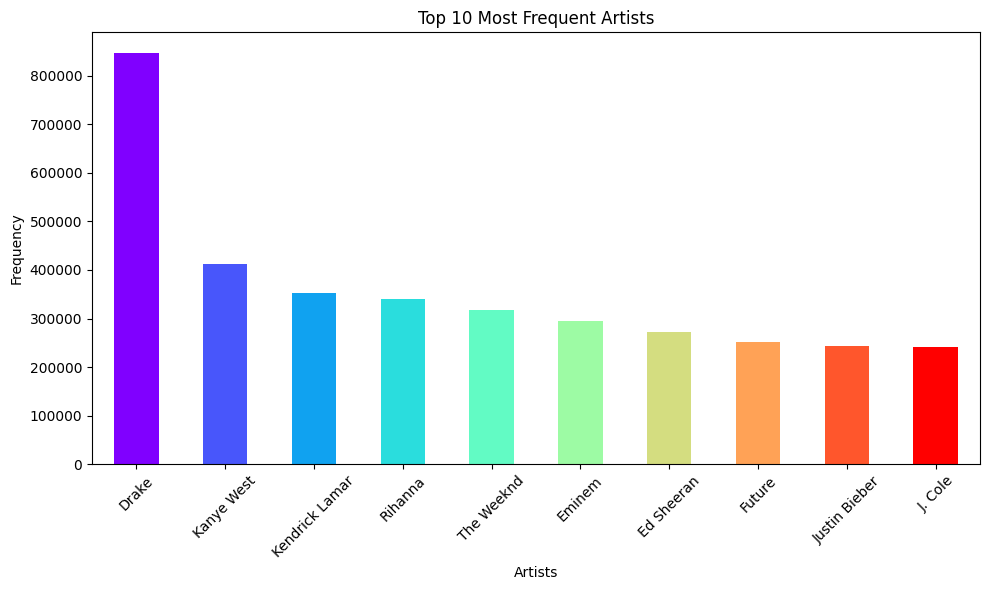

In [ ]:
# --- Top 20 most frequent tracks ---
plt.figure(figsize=(10,6))
top_tracks.plot(kind="barh", color="green")
plt.xlabel("Frequency")
plt.ylabel("Tracks")
plt.title("Top 20 Most Frequent Tracks")
plt.gca().invert_yaxis()  # le plus fréquent en haut
plt.tight_layout()
plt.show()

# --- Top 10 most frequent artists ---
colors = plt.cm.rainbow(np.linspace(0, 1, len(top_artists)))

plt.figure(figsize=(10,6))
top_artists.plot(kind="bar", color=colors)
plt.xlabel("Artists")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Artists")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Word analysis

In [ ]:

# --- Load playlists parquet ---
parquet_folder = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet"
df_playlists = pd.read_parquet(parquet_folder + "/yourfile_playlists.parquet")  # adapt filename

# --- Extract playlist names ---
names = df_playlists["name"].dropna().astype(str)

# --- Stopwords (English + French) ---
stop_words = set(stopwords.words("english")) | set(stopwords.words("french"))

# --- Tokenization and filtering ---
all_words = []
for n in names:
    words = re.findall(r"\w+", n.lower())          # split into words
    words = [w for w in words if w not in stop_words]  # remove stopwords
    all_words.extend(words)

# --- Stats ---
nb_total_words = len(all_words)
nb_unique_words = len(set(all_words))

print("Total number of words (without stopwords):", nb_total_words)
print("Number of unique words (without stopwords):", nb_unique_words)

# --- Top 20 frequent words ---
word_counts = Counter(all_words).most_common(20)
print("\nTop 20 most frequent words:")
for w, c in word_counts:
    print(f"{w}: {c}")

# --- WordCloud visualization ---
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      colormap="viridis").generate(" ".join(all_words))

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Playlist Titles (filtered stopwords)", fontsize=14)
plt.show()


Duplicates tracks in playlists (pid)

In [ ]:

parquet_folder = r"C:\Users\stag_compta\Documents\datasets\1\data_parquet_tracks"
output_folder = r"C:\Users\stag_compta\Documents\datasets\1\playlist_uniqueness"
os.makedirs(output_folder, exist_ok=True)

# List all parquet files
files = [os.path.join(parquet_folder, f) for f in os.listdir(parquet_folder) if f.endswith(".parquet")]

for f in files:
    # Read each parquet file separately
    df = dd.read_parquet(f, engine="pyarrow")
    
    # Compute uniqueness ratio per playlist (unique tracks / total tracks)
    ratio = (df.groupby("pid")["track_uri"].nunique()
             / df.groupby("pid")["track_uri"].count()).compute()
    
    # Save the result directly to CSV
    base_name = os.path.basename(f).replace(".parquet", "_uniqueness.csv")
    ratio.to_csv(os.path.join(output_folder, base_name))
    
   print(f"Processed {f}")

In [ ]:
# List all parquet files
files = [os.path.join(parquet_folder, f) for f in os.listdir(parquet_folder) if f.endswith(".parquet")]


# 3. Compute uniqueness ratio per playlist per file
for f in files:
    df = dd.read_parquet(f, engine="pyarrow")
    
    # ratio = #unique tracks / #total tracks
    ratio = (df.groupby("pid")["track_uri"].nunique()
             / df.groupby("pid")["track_uri"].count()).compute()
    
    # save per file
    base_name = os.path.basename(f).replace(".parquet", "_uniqueness.csv")
    ratio.to_csv(os.path.join(output_folder, base_name))
    print(f"Processed {f}")


# Combine all CSV results for EDA
all_csvs = glob.glob(os.path.join(output_folder, "*_uniqueness.csv"))
df_ratio = pd.concat([pd.read_csv(f) for f in all_csvs], ignore_index=True)
df_ratio.columns = ["pid", "uniqueness_ratio"]

# 5. Basic statistics
print("=== Basic statistics ===")
print(df_ratio["uniqueness_ratio"].describe())

# Histogram 
plt.figure(figsize=(8,5))
plt.hist(df_ratio["uniqueness_ratio"], bins=20, color='green', edgecolor='black')
plt.title("Distribution of Track Uniqueness Ratio per Playlist")
plt.xlabel("Uniqueness Ratio (len(set)/len)")
plt.ylabel("Number of Playlists")
plt.show()

# identify playlists with repetitions
repetitive_playlists = df_ratio[df_ratio["uniqueness_ratio"] < 1]
print(f"Number of playlists with repetitions: {len(repetitive_playlists)}")
print(repetitive_playlists.head())


pid
999000    0
999001    0
999002    0
999003    1
999004    0
         ..
999995    1
999996    0
999997    0
999998    1
999999    6
Name: track_uri, Length: 1000, dtype: int64


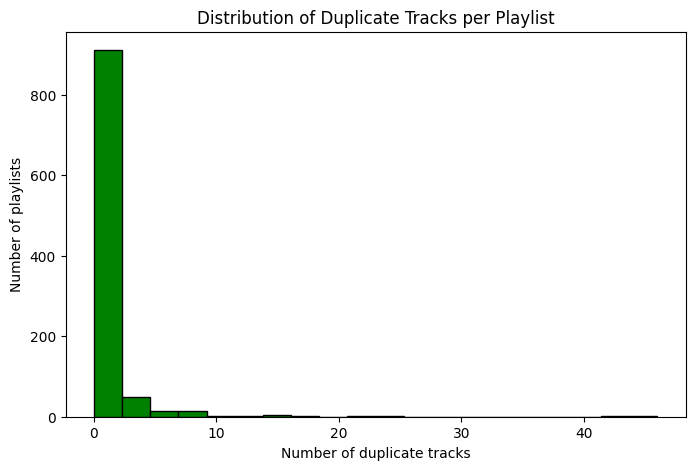

In [ ]:
duplicates = (df.groupby("pid")["track_uri"].count() 
              - df.groupby("pid")["track_uri"].nunique()).compute()
print(duplicates)
plt.figure(figsize=(8,5))
plt.hist(duplicates, bins=20, color='green', edgecolor='black')
plt.title("Distribution of Duplicate Tracks per Playlist")
plt.xlabel("Number of duplicate tracks")
plt.ylabel("Number of playlists")
plt.show()



In [ ]:
print("=== Duplicate statistics ===")
print(duplicates.describe())
print("Playlists with at least one duplicate:", (duplicates > 0).sum())


=== Duplicate statistics ===
count    1000.00000
mean        0.89100
std         2.90888
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max        46.00000
Name: track_uri, dtype: float64
Playlists with at least one duplicate: 288


In [ ]:
top_repetitive = duplicates.sort_values(ascending=False).head(20)
print(top_repetitive)


pid
999657    46
999571    43
999206    23
999783    21
999381    17
999098    17
999438    17
999113    15
999087    14
999676    14
999197    14
999727    12
999679    11
999753    11
999187     9
999267     9
999026     9
999875     9
999133     9
999984     9
Name: track_uri, dtype: int64


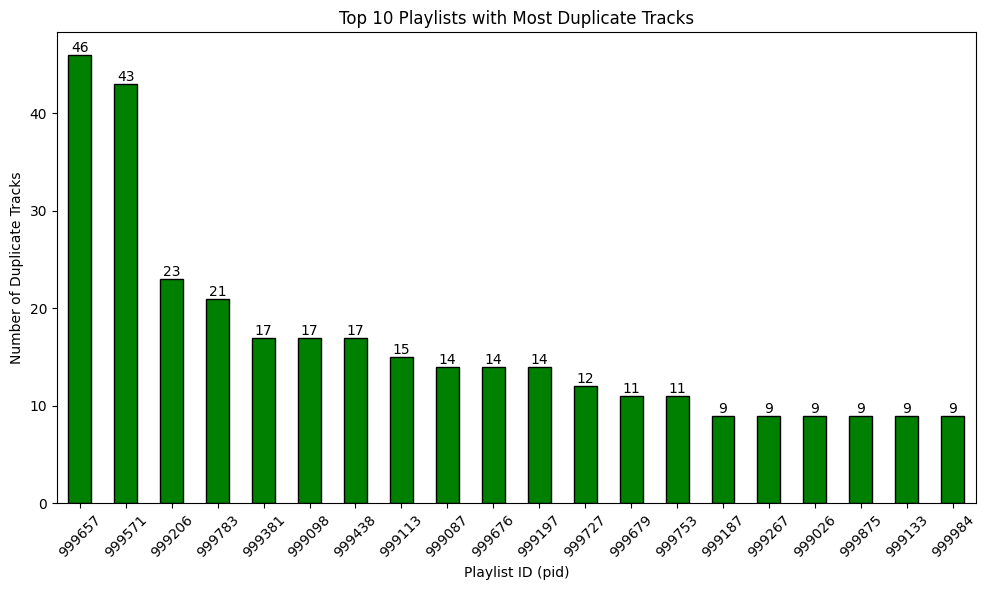

In [ ]:
plt.figure(figsize=(10,6))
ax = top_repetitive.plot(kind="bar", color="green", edgecolor="black")

plt.title("Top 10 Playlists with Most Duplicate Tracks")
plt.xlabel("Playlist ID (pid)")
plt.ylabel("Number of Duplicate Tracks")
plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, label_type="edge", fontsize=10, color="black")

plt.tight_layout()
plt.show()


Word analysis 

In [ ]:
import re
from collections import Counter

# Retrieve all playlist names
names = df_playlists["name"].dropna().compute().astype(str)

# Tokenize words (all in lowercase, only letters/numbers)
all_words = []
for n in names:
    words = re.findall(r"\w+", n.lower())  # split into words
    all_words.extend(words)

# Total number of words
nb_total_words = len(all_words)

# Number of unique words
nb_unique_words = len(set(all_words))

print("Total number of words:", nb_total_words)
print("Number of unique words:", nb_unique_words)

# Top 20 most frequent words
word_counts = Counter(all_words).most_common(20)
print("Top 20 most frequent words:")
for w, c in word_counts:
    print(f"{w}: {c}")



DONE